## Initialization

In [3]:
# importing the important libraries

import numpy as np #for dataframe manipulations
import pandas as pd #for numerical analysis
import seaborn as sns #data plotting
import matplotlib.pyplot as plt #data plotting
import matplotlib.dates as mdates #date formatter
from prophet import Prophet #data visualization

## EDA

In [5]:
# creating dataframe of the dataset present locally
# data set is taken from "https://www.kaggle.com/datasets/adelanseur/crimes-2001-to-present-chicago"
chicago_df = pd.read_csv('Crimes_-_2001_to_Present.csv')

In [6]:
chicago_df.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
1,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11449702,JB373031,07/31/2018 01:30:00 PM,009XX E HYDE PARK BLVD,2024,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,...,5.0,41.0,18,NaN,NaN,2018,04/09/2019 04:24:58 PM,NaN,NaN,NaN
3,11643334,JC209972,12/19/2018 04:30:00 PM,056XX W WELLINGTON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,31.0,19.0,14,NaN,NaN,2018,04/04/2019 04:16:11 PM,NaN,NaN,NaN
4,11645527,JC212744,02/02/2015 10:00:00 AM,069XX W ARCHER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,...,23.0,56.0,11,NaN,NaN,2015,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [7]:
chicago_df.tail(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
7842932,13128007,JG325985,06/21/2023 08:00:00 PM,031XX N CALIFORNIA AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,35.0,21.0,14,1157169.0,1920611.0,2023,07/15/2023 04:45:57 PM,41.937926,-87.697782,"(41.937925817, -87.697782474)"
7842933,13129172,JG327619,06/20/2023 04:00:00 AM,028XX N MAPLEWOOD AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,True,...,35.0,21.0,08B,1158868.0,1918755.0,2023,07/15/2023 04:45:57 PM,41.932798,-87.691589,"(41.932798095, -87.691589364)"
7842934,13128066,JG325838,06/06/2023 03:42:00 PM,018XX N LOCKWOOD AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,APARTMENT,False,False,...,37.0,25.0,17,1140792.0,1911954.0,2023,07/15/2023 04:45:57 PM,41.914487,-87.758185,"(41.914487492, -87.758185241)"
7842935,13128324,JG326502,05/13/2023 12:00:00 PM,020XX W CERMAK RD,1120,DECEPTIVE PRACTICE,FORGERY,CURRENCY EXCHANGE,False,False,...,25.0,31.0,10,1163211.0,1889404.0,2023,07/15/2023 04:45:57 PM,41.852166,-87.676455,"(41.85216632, -87.676455032)"
7842936,13128375,JG326564,06/24/2023 01:29:00 PM,069XX N HAMILTON AVE,1330,CRIMINAL TRESPASS,TO LAND,RESIDENCE,False,False,...,40.0,2.0,26,1160740.0,1946176.0,2023,07/15/2023 04:45:57 PM,42.008004,-87.683946,"(42.008003927, -87.683946124)"


<Axes: >

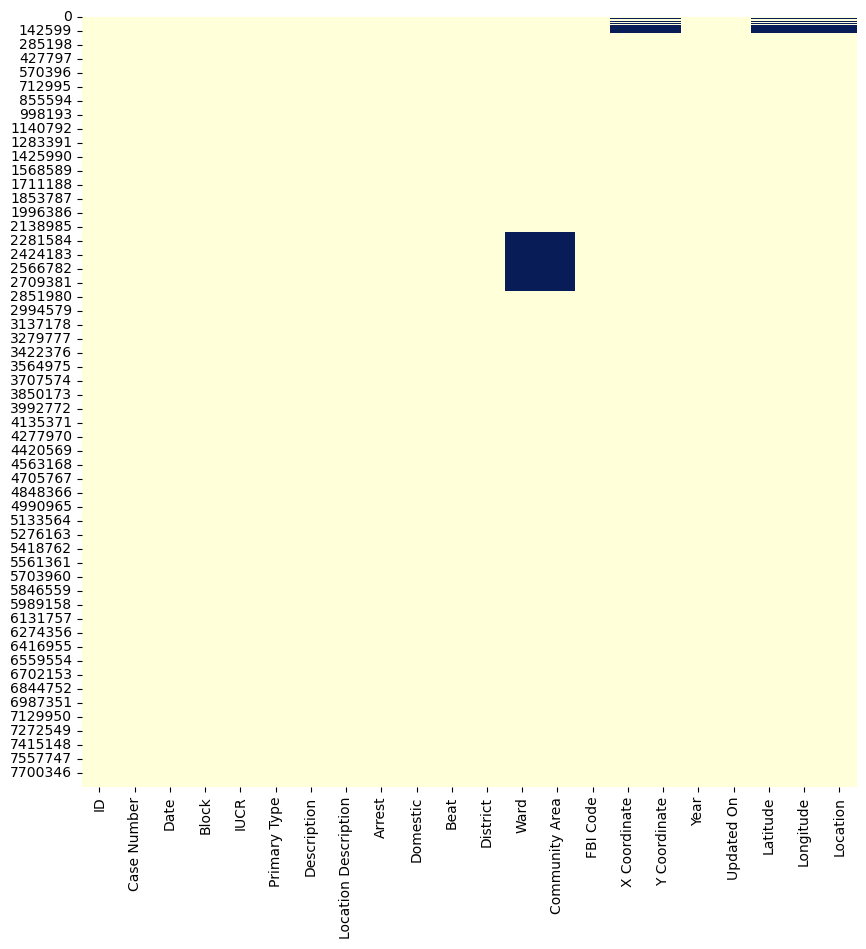

In [8]:
# visualizating the missing data in the dataset
plt.figure(figsize = (10,10))
sns.heatmap(chicago_df.isnull(), cbar = False, cmap = 'YlGnBu' )

In [9]:
chicago_df.drop(['ID', 'Case Number', 'IUCR', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location'], inplace = True, axis = 1)

In [10]:
chicago_df.head(5)

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,THEFT,OVER $500,RESIDENCE,False,True
1,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False
2,07/31/2018 01:30:00 PM,009XX E HYDE PARK BLVD,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False
3,12/19/2018 04:30:00 PM,056XX W WELLINGTON AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False
4,02/02/2015 10:00:00 AM,069XX W ARCHER AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False


In [11]:
chicago_df.shape

(7842937, 7)

In [12]:
# changing the date-time formatting to aid other processes later on
chicago_df.Date = pd.to_datetime(chicago_df.Date, format = '%m/%d/%Y %I:%M:%S %p')

In [13]:
chicago_df.head(5)

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,2018-09-01 00:01:00,082XX S INGLESIDE AVE,THEFT,OVER $500,RESIDENCE,False,True
1,2016-05-01 00:25:00,055XX S ROCKWELL ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False
2,2018-07-31 13:30:00,009XX E HYDE PARK BLVD,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False
3,2018-12-19 16:30:00,056XX W WELLINGTON AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False
4,2015-02-02 10:00:00,069XX W ARCHER AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False


In [14]:
# checking out the top types of crimes 
chicago_df['Primary Type'].value_counts()

Primary Type
THEFT                                1654618
BATTERY                              1433129
CRIMINAL DAMAGE                       894068
NARCOTICS                             748690
ASSAULT                               512441
OTHER OFFENSE                         486983
BURGLARY                              426001
MOTOR VEHICLE THEFT                   381815
DECEPTIVE PRACTICE                    348897
ROBBERY                               294451
CRIMINAL TRESPASS                     215300
WEAPONS VIOLATION                     108509
PROSTITUTION                           69876
OFFENSE INVOLVING CHILDREN             56202
PUBLIC PEACE VIOLATION                 52531
SEX OFFENSE                            30999
CRIM SEXUAL ASSAULT                    27606
INTERFERENCE WITH PUBLIC OFFICER       18507
LIQUOR LAW VIOLATION                   14948
GAMBLING                               14620
ARSON                                  13378
HOMICIDE                               127

In [15]:
# top 15 among the top types of crime 
chicago_df['Primary Type'].value_counts().iloc[:15]

Primary Type
THEFT                         1654618
BATTERY                       1433129
CRIMINAL DAMAGE                894068
NARCOTICS                      748690
ASSAULT                        512441
OTHER OFFENSE                  486983
BURGLARY                       426001
MOTOR VEHICLE THEFT            381815
DECEPTIVE PRACTICE             348897
ROBBERY                        294451
CRIMINAL TRESPASS              215300
WEAPONS VIOLATION              108509
PROSTITUTION                    69876
OFFENSE INVOLVING CHILDREN      56202
PUBLIC PEACE VIOLATION          52531
Name: count, dtype: int64

In [16]:
orderData = chicago_df['Primary Type'].value_counts().iloc[:15].index

In [17]:
orderData

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT',
       'OTHER OFFENSE', 'BURGLARY', 'MOTOR VEHICLE THEFT',
       'DECEPTIVE PRACTICE', 'ROBBERY', 'CRIMINAL TRESPASS',
       'WEAPONS VIOLATION', 'PROSTITUTION', 'OFFENSE INVOLVING CHILDREN',
       'PUBLIC PEACE VIOLATION'],
      dtype='object', name='Primary Type')

In [18]:
#chicago_df.drop(['Date'], inplace = True, axis = 1)

In [19]:
chicago_df.head(5)

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,2018-09-01 00:01:00,082XX S INGLESIDE AVE,THEFT,OVER $500,RESIDENCE,False,True
1,2016-05-01 00:25:00,055XX S ROCKWELL ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False
2,2018-07-31 13:30:00,009XX E HYDE PARK BLVD,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False
3,2018-12-19 16:30:00,056XX W WELLINGTON AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False
4,2015-02-02 10:00:00,069XX W ARCHER AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False


<Axes: xlabel='count', ylabel='Primary Type'>

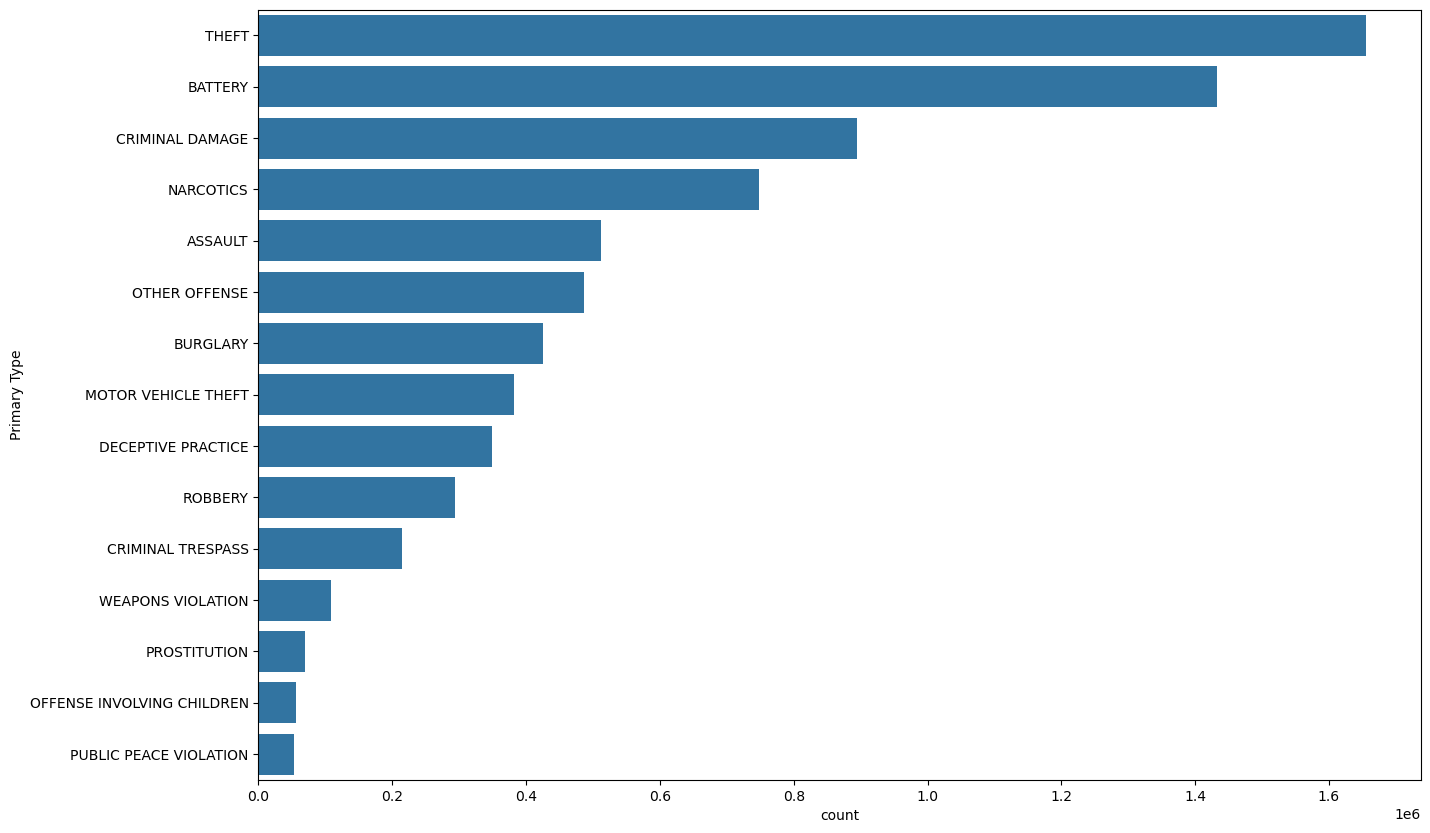

In [20]:
# visualizing the different types of crimes and their count
plt.figure(figsize = (15,10))
sns.countplot(y = 'Primary Type', data = chicago_df, order = orderData)

<Axes: xlabel='count', ylabel='Location Description'>

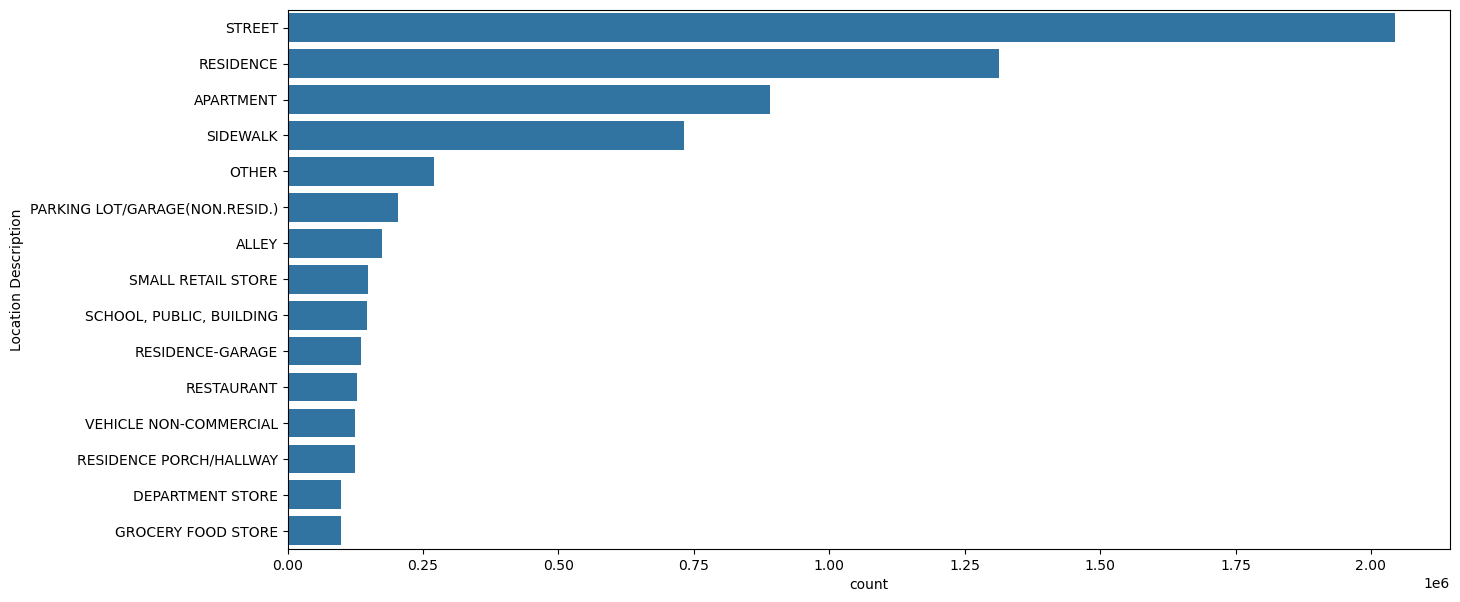

In [21]:
#visualizing the count of crimes in the top locations that are prone to high crime rate
plt.figure(figsize = (15,7))
sns.countplot(y = 'Location Description', data = chicago_df, order = chicago_df['Location Description'].value_counts().iloc[:15].index)

In [22]:
#seeing the total number of crimes per year
chicago_df.index = pd.DatetimeIndex(chicago_df.Date)

In [79]:
chicago_df.drop(['Date'], inplace = True, axis = 1)

In [81]:
chicago_df.head(5)

,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,
2018-09-01 00:01:00,082XX S INGLESIDE AVE,THEFT,OVER $500,RESIDENCE,False,True
2016-05-01 00:25:00,055XX S ROCKWELL ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False
2018-07-31 13:30:00,009XX E HYDE PARK BLVD,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False
2018-12-19 16:30:00,056XX W WELLINGTON AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False
2015-02-02 10:00:00,069XX W ARCHER AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False


In [83]:
chicago_df.resample('YE').size()

Date
2001-12-31    485885
2002-12-31    486805
2003-12-31    475983
2004-12-31    469421
2005-12-31    453772
2006-12-31    448178
2007-12-31    437087
2008-12-31    427169
2009-12-31    392825
2010-12-31    370504
2011-12-31    351974
2012-12-31    336273
2013-12-31    307476
2014-12-31    275742
2015-12-31    264774
2016-12-31    269807
2017-12-31    269093
2018-12-31    268809
2019-12-31    261291
2020-12-31    212166
2021-12-31    208716
2022-12-31    238694
2023-12-31    130493
Freq: YE-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

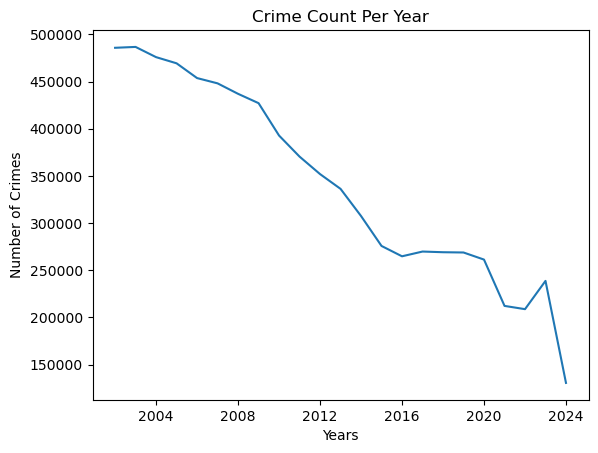

In [84]:
#visualizing the total number of crimes per year
plt.plot(chicago_df.resample('YE').size())
plt.title('Crime Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

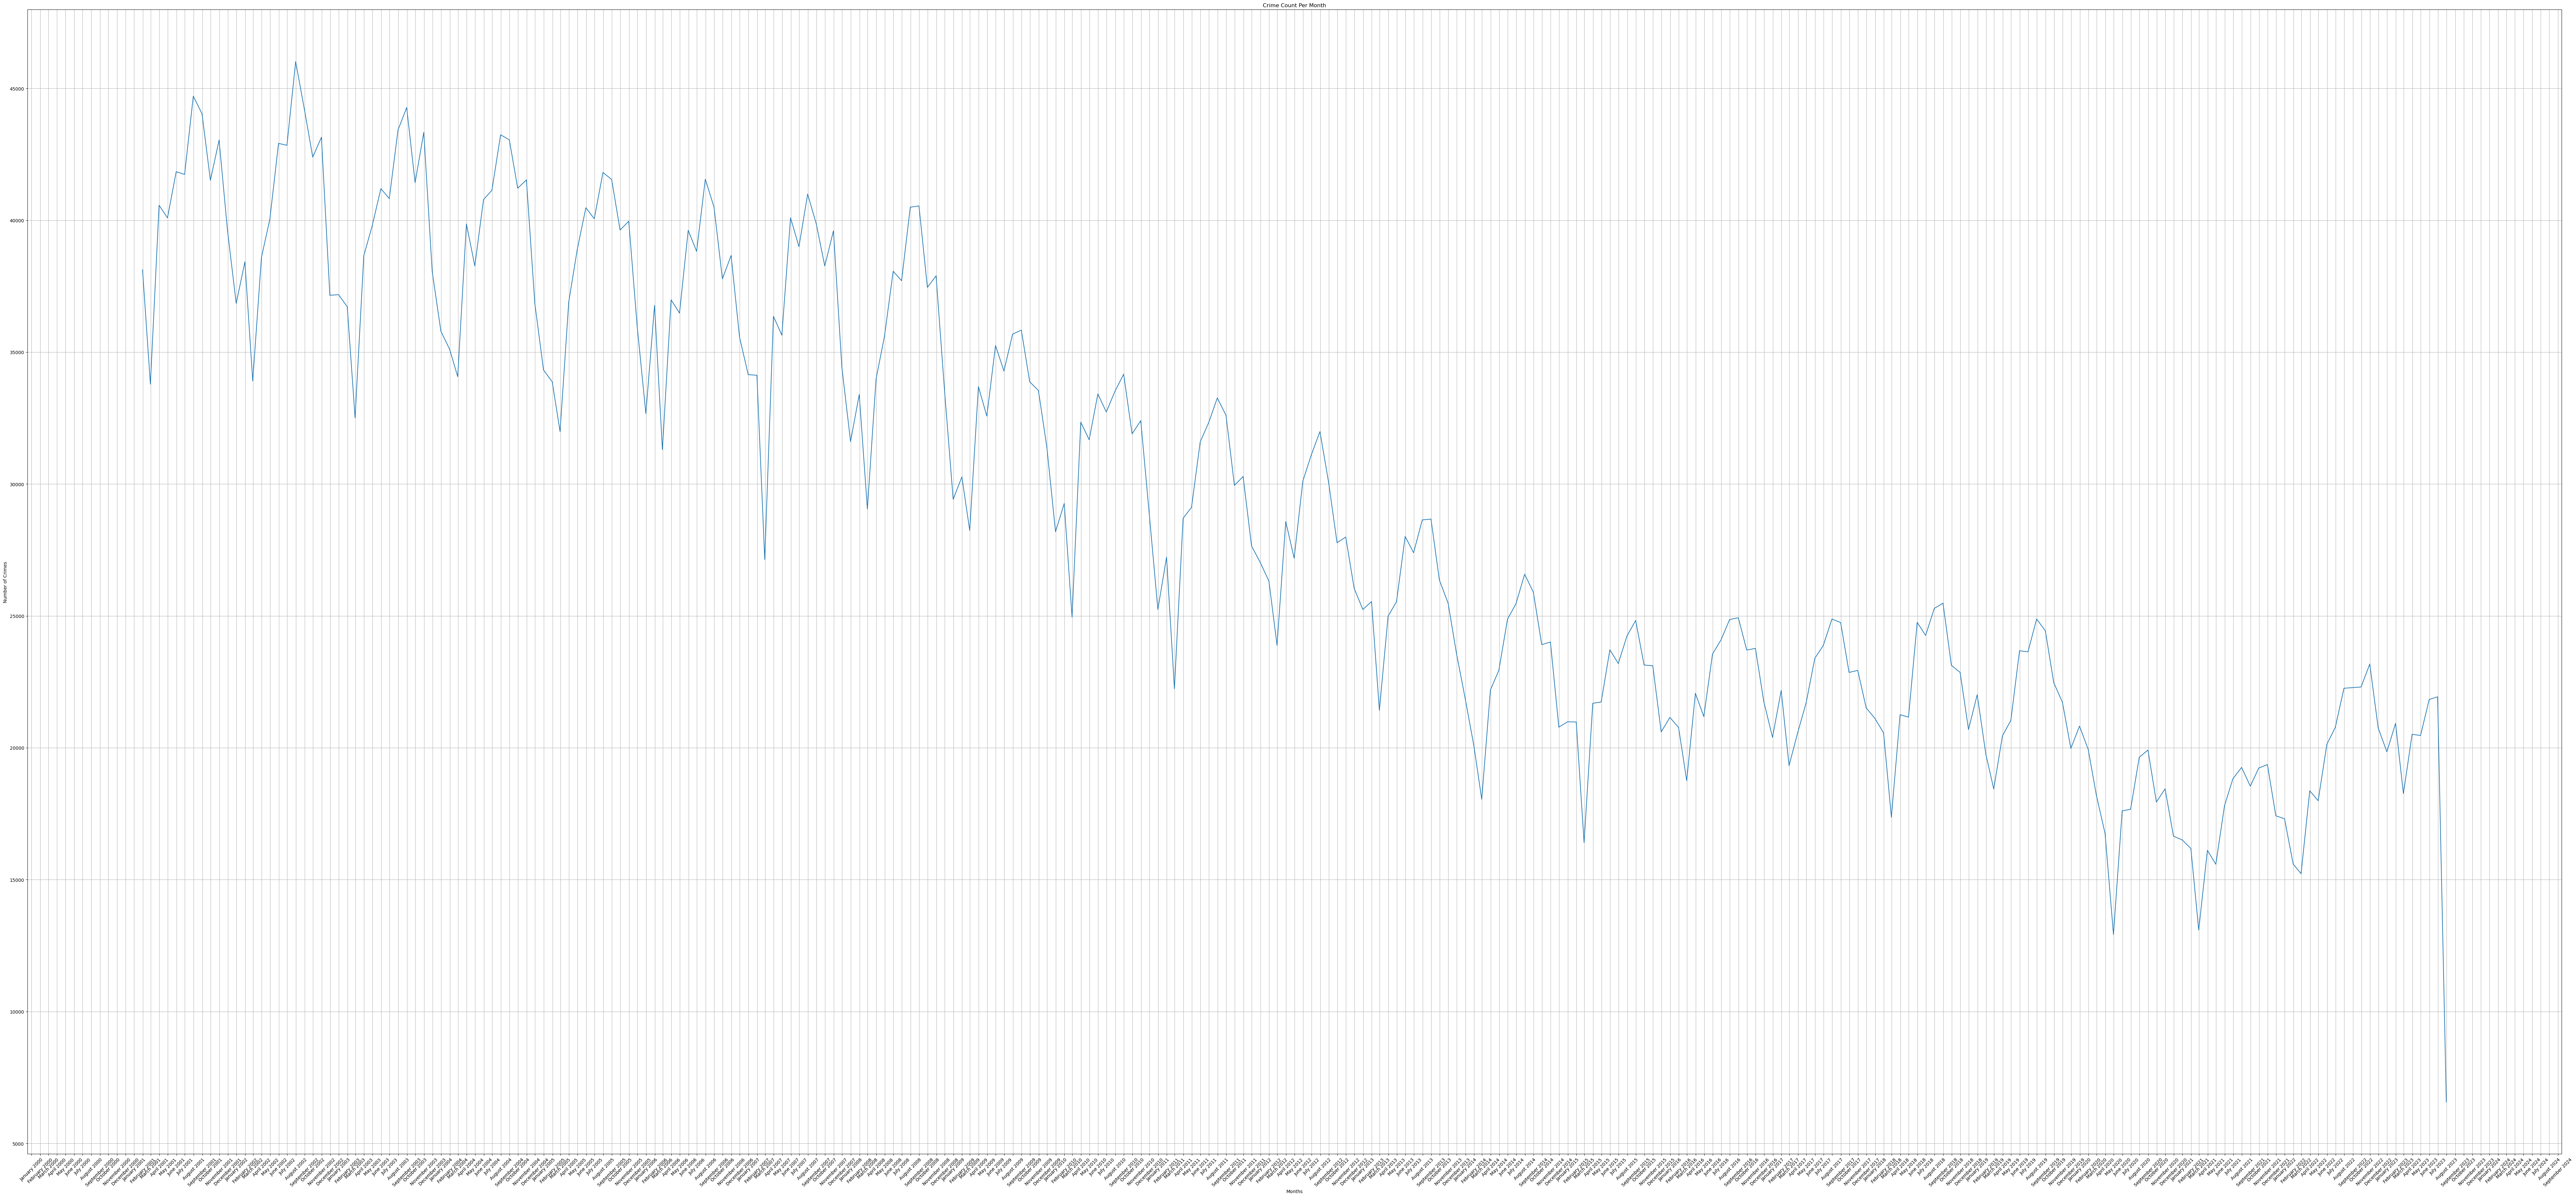

In [85]:
# Monthly Crime Count - 1 :: with the name of each month
plt.figure(figsize=(100,100))
plt.subplot(2, 1, 1)  # Create a subplot for monthly data
monthly_counts = chicago_df.resample('ME').size()
plt.plot(monthly_counts)
plt.title('Crime Count Per Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')

# Format the x-axis to show month names
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set major ticks to months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B %Y'))  # Format ticks to show month and year
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid()

Text(0, 0.5, 'Number of Crimes')

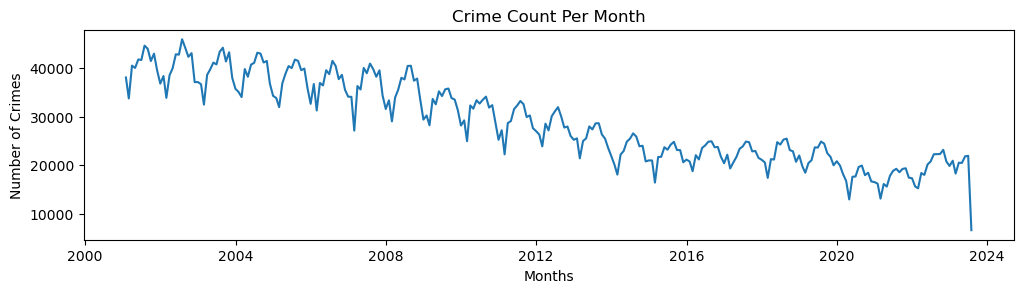

In [86]:
# Monthly Crime Count - 2 :: without the name of each month
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)  # Create a subplot for monthly data
plt.plot(chicago_df.resample('ME').size())
plt.title('Crime Count Per Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')

Text(0, 0.5, 'Number of Crimes')

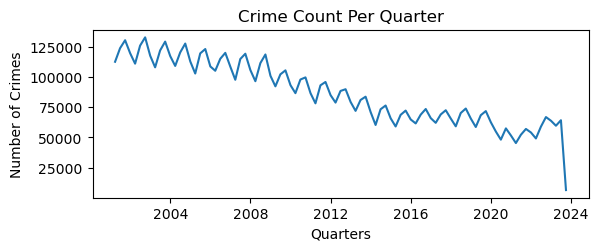

In [87]:
#Quarterly crime count
plt.subplot(2, 1, 2)
plt.plot(chicago_df.resample('QE').size())
plt.title('Crime Count Per Quarter')
plt.xlabel('Quarters')
plt.ylabel('Number of Crimes')

## Preparing the Data for Prophet

In [89]:
chicago_prophet_df = chicago_df.resample('ME').size().reset_index()

In [90]:
chicago_prophet_df

,Date,0
0,2001-01-31,38119
1,2001-02-28,33786
2,2001-03-31,40566
3,2001-04-30,40091
4,2001-05-31,41839
...,...,...
266,2023-03-31,20510
267,2023-04-30,20465
268,2023-05-31,21829
269,2023-06-30,21932


In [91]:
chicago_prophet_df.columns = ['Date', 'Crime Count']

In [92]:
chicago_prophet_df

,Date,Crime Count
0,2001-01-31,38119
1,2001-02-28,33786
2,2001-03-31,40566
3,2001-04-30,40091
4,2001-05-31,41839
...,...,...
266,2023-03-31,20510
267,2023-04-30,20465
268,2023-05-31,21829
269,2023-06-30,21932


In [93]:
#compling with the docs, setting the header as ds and y
chicago_prophet_df_final = chicago_prophet_df.rename(columns = {'Date' : 'ds', 'Crime Count' : 'y'})

In [94]:
chicago_prophet_df_final

,ds,y
0,2001-01-31,38119
1,2001-02-28,33786
2,2001-03-31,40566
3,2001-04-30,40091
4,2001-05-31,41839
...,...,...
266,2023-03-31,20510
267,2023-04-30,20465
268,2023-05-31,21829
269,2023-06-30,21932


## Predictions

In [96]:
m = Prophet()

In [97]:
m.fit(chicago_prophet_df_final)

15:56:04 - cmdstanpy - INFO - Chain [1] start processing
15:56:04 - cmdstanpy - INFO - Chain [1] done processing


In [98]:
future = m.make_future_dataframe(periods=720) #predictions for two years
forecast = m.predict(future)

In [99]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,41777.595376,37225.011259,41384.159996,41777.595376,41777.595376,-2543.473051,-2543.473051,-2543.473051,-2543.473051,-2543.473051,-2543.473051,0.0,0.0,0.0,39234.122325
1,2001-02-28,41716.360451,34330.227836,38747.443492,41716.360451,41716.360451,-5210.185461,-5210.185461,-5210.185461,-5210.185461,-5210.185461,-5210.185461,0.0,0.0,0.0,36506.174991
2,2001-03-31,41648.564642,38593.775413,42804.927067,41648.564642,41648.564642,-999.209677,-999.209677,-999.209677,-999.209677,-999.209677,-999.209677,0.0,0.0,0.0,40649.354965
3,2001-04-30,41582.955794,38155.595338,42548.752434,41582.955794,41582.955794,-1241.178430,-1241.178430,-1241.178430,-1241.178430,-1241.178430,-1241.178430,0.0,0.0,0.0,40341.777363
4,2001-05-31,41515.159984,40682.700587,45012.624814,41515.159984,41515.159984,1397.451723,1397.451723,1397.451723,1397.451723,1397.451723,1397.451723,0.0,0.0,0.0,42912.611707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,2025-07-16,16838.986010,-6698.113498,-2508.338969,16619.650105,17050.558920,-21451.792408,-21451.792408,-21451.792408,-21451.792408,-21451.792408,-21451.792408,0.0,0.0,0.0,-4612.806398
987,2025-07-17,16837.222788,-7411.737334,-2843.891630,16617.480694,17049.402582,-21939.600913,-21939.600913,-21939.600913,-21939.600913,-21939.600913,-21939.600913,0.0,0.0,0.0,-5102.378125
988,2025-07-18,16835.459566,-7480.064025,-3033.309045,16615.311283,17048.246243,-22095.033044,-22095.033044,-22095.033044,-22095.033044,-22095.033044,-22095.033044,0.0,0.0,0.0,-5259.573479
989,2025-07-19,16833.696344,-7298.029839,-2794.001807,16613.141873,17047.089904,-21902.739627,-21902.739627,-21902.739627,-21902.739627,-21902.739627,-21902.739627,0.0,0.0,0.0,-5069.043284


/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


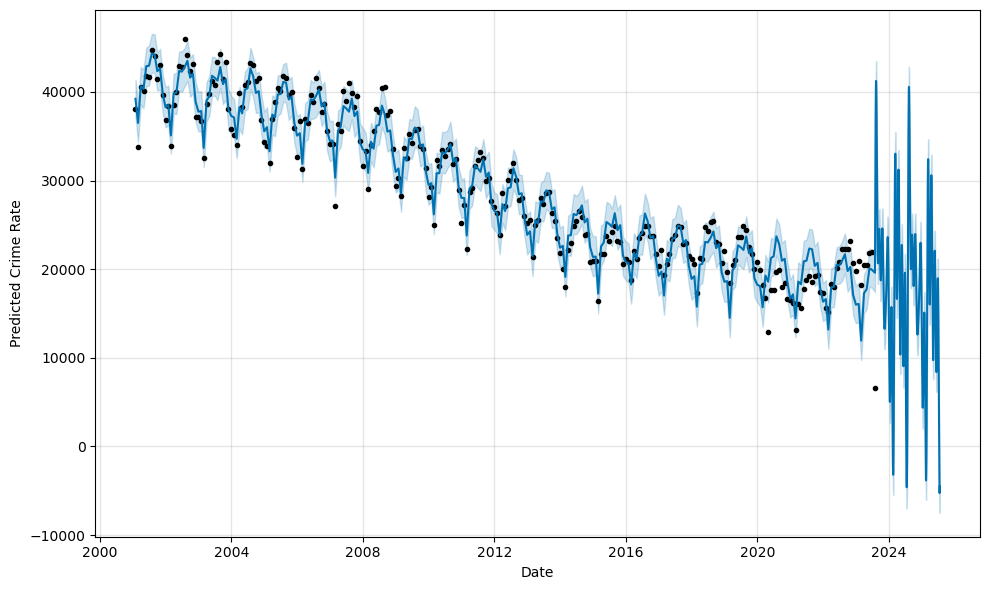

In [101]:
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'Predicted Crime Rate')

/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call 

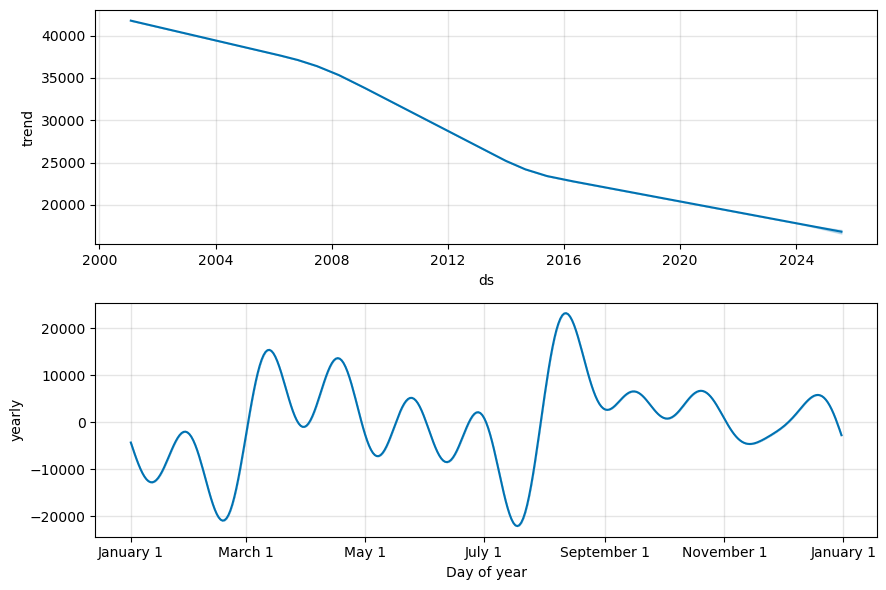

In [102]:
figure = m.plot_components(forecast)

--vedanta banerjee || 14.08.2024